# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Подключение библиотек

In [2]:
import pandas as pd

## Откройте файл с данными и изучите общую информацию. 

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [4]:
# изучим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# выведим первые 10 строк датафрейма
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
# количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

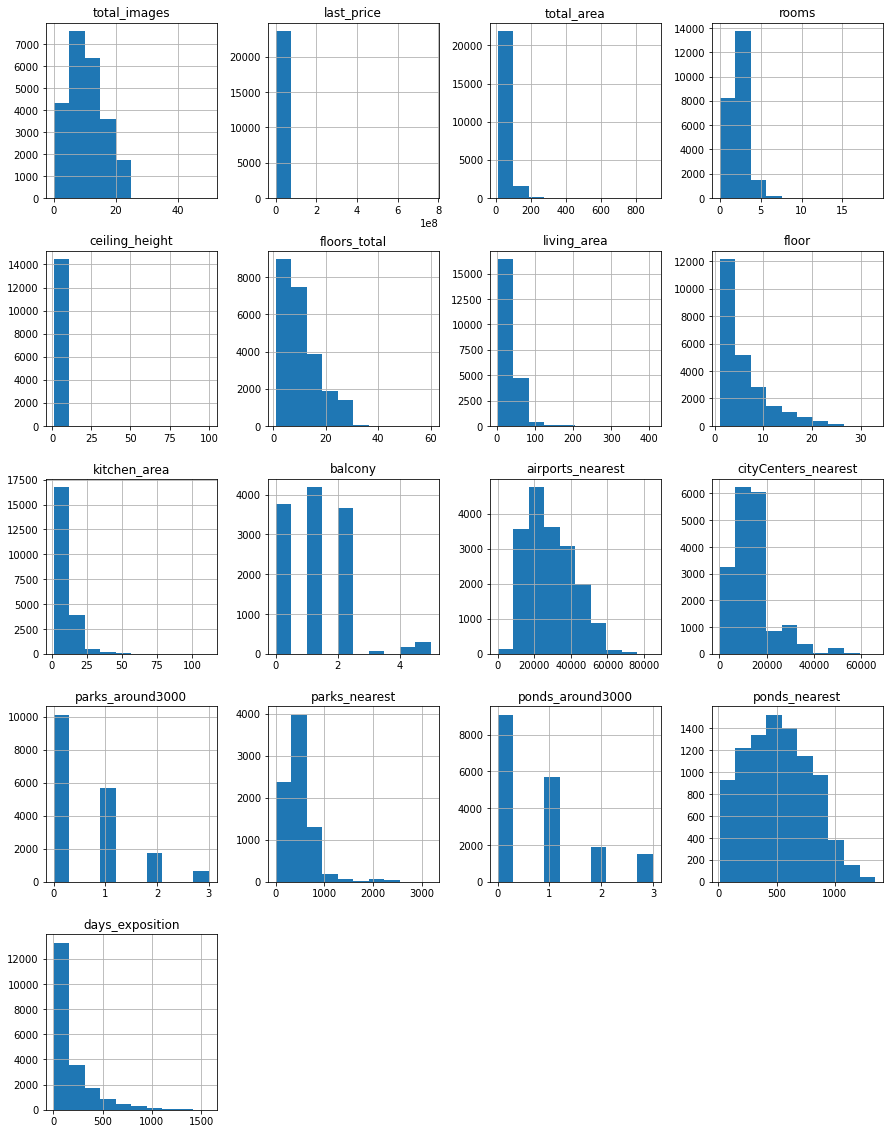

In [7]:
data.hist(figsize=(15, 20))

**Вывод по общей информации**
1. Найдены нулевые значения: 
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition
2. Неверный тип данных:
- last_price  float64 должен быть int
- first_day_exposition  object должен быть datetime
- floors_total  float64 должен быть int
- is_apartment   object должен быть bool
- balcony  float64 должен быть int
- locality_name  object должен быть str
- parks_around3000  float64 должен быть int
- ponds_around3000  float64 должен быть int
- days_exposition  float64 должен быть int

## Предобработка данных

In [8]:
# переведем тип object столбца first_day_exposition в тип datetime, но без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [9]:
# заменим все пропущенные значения в is_apartment на False и изменим тип данных на bool
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['is_apartment'].unique()

array([False,  True])

In [10]:
# заменим пропуски в balcony, parks_around3000 и ponds_around3000 на 0 и тип данных на int,
# так как колличество балконов, число парков и число водоемов может быть только целым числом
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [11]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [12]:
# проверим есть ли зависимость межде parks_nearest и parks_around3000
data[data['parks_nearest'].isna() == True]['parks_around3000'].value_counts()

# для всех пропущенных значений parks_nearest значение parks_around3000 = 0, 
# это говорит о том, что рядом нет парков и пропуски можно заполнить 0
data.loc[(data['parks_nearest'].isna() == True) & (data['parks_around3000'] == 0), 'parks_nearest'] = 0

In [13]:
# проверим есть ли зависимость межде ponds_nearest и ponds_around3000
data[data['ponds_nearest'].isna() == True]['ponds_around3000'].value_counts()

# для всех пропущенных значений ponds_nearest значение ponds_around3000 = 0, 
# это говорит о том, что рядом нет парков и пропуски можно заполнить 0
data.loc[(data['ponds_nearest'].isna() == True) & (data['ponds_around3000'] == 0), 'ponds_nearest'] = 0

In [14]:
# изменим тип данных last_price для удобства
data['last_price'].astype('int')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

count    23688.000000
mean         2.696742
std          0.220135
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

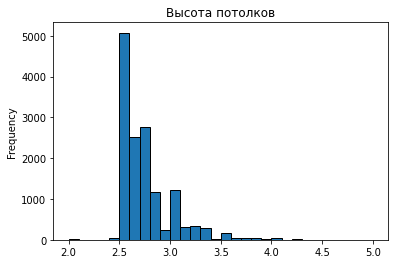

In [15]:
# изучим значения ceiling_height
data['ceiling_height'].value_counts()
data['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist', bins=30, range=(2,5), title='Высота потолков', ec='black')

# видим необоснованно большие значения ceiling_height, пока оставим как есть. Связано скорее всего с единицами измерения.
# минимальное значение 1 м и максимальное значение 100 м явно ошибочны.
# среднее значение составляет 2.771499, что похоже на правду.
# разделим значения, которые похожи на ошибку единиц измерения от 20м на 10 
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)

# заменим пропуски на медианы, т.к. все равно остались слишком большие значения
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# удалим значения явно нереальные 
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] < 6)]
data['ceiling_height'].describe()

In [16]:
# изучим пропущенные занные 'floors_total'
data[data['floors_total'].isna()]['floor']
data['floors_total'].value_counts()
# Скорее всего продавец не указал сколько всего этажей в доме, т.к. квартира находится на последнем этаже

data['floors_total'] =data['floors_total'].fillna(data['floor']).astype('int')

# изучим количество объявлений с домами выше 40 этажей
len(data[data['floors_total'] > 40])

# их всего 2, это скроее всего какая-то ошибка, т.к. в Петербурге самый высокий жилой дом имеет 37 этажей. Удалим их
data = data[data['floors_total'] <= 40]
len(data)

23686

In [17]:
# изучим пропущенные занные 'locality_name'
data[data['locality_name'].isna()]

# удалим строки с пропущенными значениями locality_name и cityCenters_nearest, т.к. восстановить их не получится
data = data[~(data['locality_name'].isna() == True) | ~(data['cityCenters_nearest'].isna() == True)]
data['locality_name'] = data['locality_name'].astype('str')

# заменим все дубликаты в locality_name и укоротим названия
data['locality_name'] = [elem.replace('посёлок', 'поселок') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('городской поселок ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('поселок городского типа ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('коттеджный поселок ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('поселок при железнодорожной станции ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('поселок станции ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('имени ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('поселок ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('садоводческое некоммерческое товарищество ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('садовое товарищество ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('село ', '') for elem in data['locality_name']]
data['locality_name'] = [elem.replace('деревня ', '') for elem in data['locality_name']]


len(data['locality_name'].sort_values().unique())
data['locality_name'].sort_values().unique()

array(['nan', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', '

In [18]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1902
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2274
balcony                    0
locality_name              0
airports_nearest        5532
cityCenters_nearest     5509
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

In [19]:
# изучим расстояния от центра города до населенного пункта
data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=('median', 'min', 'max'))

,max,median,min
locality_name,,,
nan,41294.0,8943.0,1322.0
Александровская,27584.0,27468.0,27352.0
Белоостров,38868.0,38868.0,38868.0
Зеленогорск,62706.0,53381.0,51115.0
Колпино,37477.0,32018.0,29436.0
Красное Село,41792.0,29142.0,27317.0
Кронштадт,51511.0,49597.5,46657.0
Левашово,25727.0,25727.0,25727.0
Лисий Нос,28246.0,28226.0,26368.0


In [20]:
(data['cityCenters_nearest'] > 16000).sum()

4948

In [21]:
# заполним пропуски в locality_name значением 'Санкт-Петербург', если 'cityCenters_nearest'< 16000, остальные значения удалим
# т.к. их невозможно восстановить

print(data[data['locality_name'] == 'nan']['cityCenters_nearest'].value_counts())
data = data[~(data['locality_name'] == 'nan') | ~(data['cityCenters_nearest'] > 16000)]
data['locality_name'] = data['locality_name'].replace('nan', 'Санкт-Петербург')

len(data)
data.head()

17369.0    8
4258.0     2
12332.0    2
8943.0     2
4065.0     1
4474.0     1
4805.0     1
3312.0     1
1780.0     1
8429.0     1
4383.0     1
8127.0     1
31813.0    1
9497.0     1
3902.0     1
4604.0     1
16788.0    1
10976.0    1
1322.0     1
4069.0     1
8582.0     1
9538.0     1
41294.0    1
5382.0     1
3801.0     1
31897.0    1
8619.0     1
23659.0    1
3039.0     1
9633.0     1
4627.0     1
Name: cityCenters_nearest, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,Шушары,12817.0,18603.0,0,0.0,0,0.0,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


In [22]:
(data['cityCenters_nearest'] > 16000).sum()

4935

In [23]:
# заполним 'cityCenters_nearest' медианой по 'locality_name'
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
data['cityCenters_nearest'].isna().sum()

# остались пропуски, это значит, что для этих 'locality_name' данные 'cityCenters_nearest' отсутствуют
# оставим так

4827

In [24]:
# проверим есть ли в данных явные ошибки в площадях квартир
# То есть проверим суммы kitchen_area и living_area, как они относяться к total_area
len(data.query('(kitchen_area + living_area ) > total_area '))

# Видим, что 64 total_area меньше суммы kitchen_area и living_area, что противоречит логике. Удалим их
incorrect_area_index = data[(data['kitchen_area'] + data['living_area']) > (data['total_area'])].index
data.drop(incorrect_area_index, inplace=True)

len(data)

23601

In [25]:
# изучим пропущенные данные в living_area
data['living_area'].isna().sum()

# предположим, что размер жилой площади зависит от общей площади квартиры 
# возьмем среднее отношение 'total_area' к 'living_area'
ratio_living_area_mean = round(data['total_area'] / data['living_area'], 1).mean()

# заполним пропуски в 'living_area' разделив 'total_area' на среднее отношение
data['living_area'] = round(data['living_area'].fillna(data['total_area'] / ratio_living_area_mean), 1)

In [26]:
data['kitchen_area'].isna().sum()

ratio_kitchen_area_mean = round(data['total_area'] / data['kitchen_area'], 1).mean()

data['kitchen_area'] = round(data['kitchen_area'].fillna(data['total_area'] / ratio_kitchen_area_mean), 1)

In [27]:
# заполним 'airports_nearest' медианой по 'locality_name'
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
data['airports_nearest'].isna().sum()

# остались пропуски, это значит, что для этих 'locality_name' данные 'airports_nearest' отсутствуют
# оставим так

4810

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23601 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23601 non-null  int64         
 1   last_price            23601 non-null  float64       
 2   total_area            23601 non-null  float64       
 3   first_day_exposition  23601 non-null  datetime64[ns]
 4   rooms                 23601 non-null  int64         
 5   ceiling_height        23601 non-null  float64       
 6   floors_total          23601 non-null  int64         
 7   living_area           23601 non-null  float64       
 8   floor                 23601 non-null  int64         
 9   is_apartment          23601 non-null  bool          
 10  studio                23601 non-null  bool          
 11  open_plan             23601 non-null  bool          
 12  kitchen_area          23601 non-null  float64       
 13  balcony         

In [29]:
print('Количество значений до обработки: 23699')
print('Количество значений после обработки:',len(data))
print('Процент удаленных данных:', '{:.2%}'.format((23699 - len(data))/23699))

Количество значений до обработки: 23699
Количество значений после обработки: 23601
Процент удаленных данных: 0.41%


В двух столбцах есть пропущенные значения - то что невозможно восстановить, так как нет данных. Пока оставим их так.
В ходе предобработки исходный размер данных 23699 уменьшился на 0.41% и в в окончательном виде имеется 23603 строка правильных данных.

## Посчитайте и добавьте в таблицу новые столбцы

**1. Цена квадратного метра**

In [30]:
data['price_per_metre'] =(data['last_price'] / data['total_area'] * 100).round()/100
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,Шушары,12817.0,18603.0,0,0.0,0,0.0,81,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,86.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00


**2. Добавим столбцы: день недели, месяц и год публикации**

In [31]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,0,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,0.0,0,0.0,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,86.0,9,False,...,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


**3. Добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [32]:
#функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category'].value_counts() 

другой       17290
последний     3402
первый        2909
Name: floor_category, dtype: int64

**4. Добавлено в таблицу: расстояние в км до центра города**

In [33]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,weekday,month,year,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,0,120370.37,3,3,2019,другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0,0.0,81,82920.79,1,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92785.71,3,8,2015,другой,13.933
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,86.0,9,False,...,84.0,3,234.0,424,408176.10,4,7,2015,другой,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.098


## Проведите исследовательский анализ данных

**1. Изучим следующие параметры объектов:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**1.1 Общая площадь**

count    23601.000000
mean        60.377580
std         35.685841
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

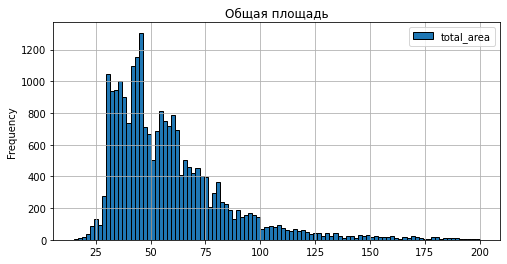

In [34]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (15,200), title='Общая площадь', ec='black')
data['total_area'].describe()

In [35]:
len(data[data['total_area'] > 200])

227

Больше всего квартир находиться в районе от 30 до 65 кв.м. Выбросы больше 200 кв.м. - скорее всего, отдельные частные дома (их всего 227 шт.)

**1.2 Жилая площадь**

count    23601.000000
mean        34.425194
std         22.236748
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

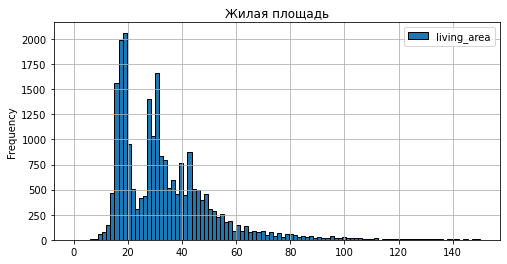

In [36]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,150), title='Жилая площадь', ec='black')
data['living_area'].describe()

In [37]:
len(data[data['living_area'] > 150])

134

Есть два интервала максимальной жилой площади:
- от 18 до 20 кв.м. - скорее всего студии и маленькие квартиры - их больше всего
- от 25 до 35 кв.м. 
- Выбросы больше 150 кв.м. - скорее всего, отдельные частные дома или коммуналки (их всего 134 шт.)
- Медиана жилой площади составляет 30 кв.м., т.к. есть большие выбросы, лучше ориентироваться на нее

**1.3 Площадь кухни**

count    23601.000000
mean        10.426283
std          5.980705
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

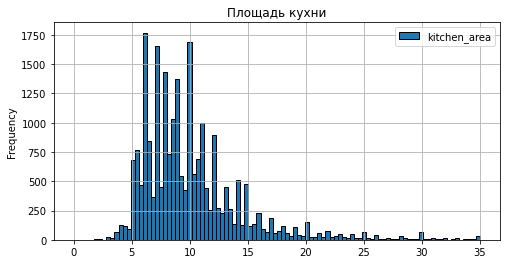

In [38]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,35), title='Площадь кухни', ec='black')
data['kitchen_area'].describe()

In [39]:
len(data[data['kitchen_area'] > 30])

355

- Есть очень маленькие кухни от 1.3 до 5 кв.м., скорее всего это кухни в студиях
- Больше всего кухонь от 6 до 10 кв.м., что похоже на правду
- Количество квартир с кухнями более 30 кв.м. всего 355
- Выбросы, слишком большие кухни, скорее всего, в коммуналках.

**1.4 Цена объекта**

count    2.360100e+04
mean     6.542836e+06
std      1.088307e+07
min      1.219000e+04
25%      3.405000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

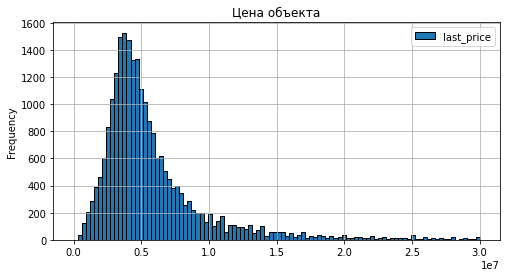

In [40]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0, 30000000), title='Цена объекта', ec='black')
data['last_price'].describe()

In [41]:
len(data[data['last_price'] > 30000000])

315

- Средняя цена квартиры 6,5 млн.руб.
- Медиана цены 4,65 млн.руб.
- Чаще всего встречаются цены от 2,5 до 5,5 млн.руб.
- Количество квартир стоимостью более 30 млн.руб. всего 315
- График не очень информативный, т.к. не отображает зависимость цены от количества комнат, квадратного метра и от года

**Рассмотрим цену квадратного метра**

count    2.360100e+04
mean     9.938897e+04
std      5.013957e+04
min      1.118300e+02
25%      7.662116e+04
50%      9.500000e+04
75%      1.142287e+05
max      1.907500e+06
Name: price_per_metre, dtype: float64

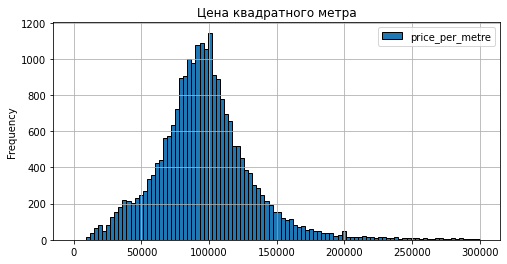

In [42]:
data.plot(y = 'price_per_metre', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0, 300000), title='Цена квадратного метра', ec='black')
data['price_per_metre'].describe()

- Больше всех квартир находяться в районе от 60 до 130 тыс. рублей за кв.м.

**Рассмотрим зависимость стоимости квадратного метра от года продажи**

In [43]:
print('Коэффициент корреляции Пирсона равен', round(data['price_per_metre'].corr(data['year']), 4))

Коэффициент корреляции Пирсона равен 0.0085


Корреляция в 0.0085 говорит о том, что связи между ценой за квадратный метр и годом нет

**Рассмотрим зависимость стоимости квартиры от количества комнат**

In [44]:
print('Коэффициент корреляции Пирсона равен', round(data['last_price'].corr(data['rooms']), 2))

Коэффициент корреляции Пирсона равен 0.36


Корреляция в 0.36 говорит о том, что связь между ценой и количеством комнат есть, но очень не сильная

**1.5 Количество комнат**

count    23601.000000
mean         2.071988
std          1.079287
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

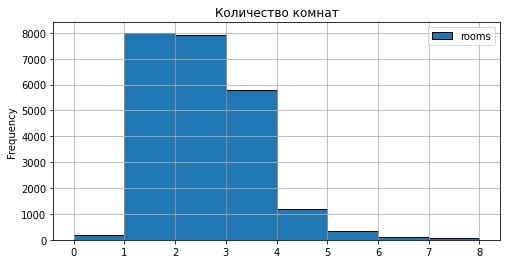

In [45]:
data.plot(y = 'rooms', kind = 'hist', bins = 8, grid=True, figsize = (8,4), range = (0, 8), title='Количество комнат', ec='black')
data['rooms'].describe()

In [46]:
len(data[data['rooms'] > 6])

90

- Число комнат колеблется от 1 до 19
- Среднее число комнат в квартирах 2, так же как и медиана
- Чаще продают квартиры с 1 и 2 комнатами
- Квартиры с числом комнат более 6 встречаются очень редко, их всего 90 шт.
- Есть квартиры с числом комнат 0 - это студии
- Большое число комнат, скорее всего у коммуналок или частных домов

**1.6 Высота потолков**

count    23601.000000
mean         2.696708
std          0.220092
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

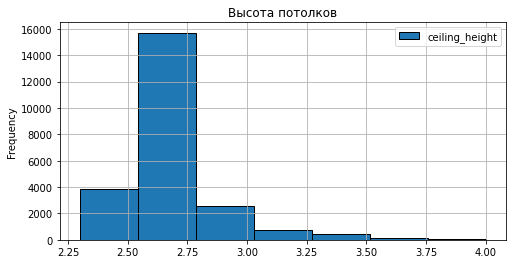

In [47]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 7, grid=True, figsize = (8,4), range = (2.3, 4), title='Высота потолков', ec='black')
data['ceiling_height'].describe()

In [48]:
len(data[data['ceiling_height'] > 4])

44

- Большинство квартир имеют высоту потолков от 2,4 до 2,8 м.
- В среднем квартиры имеют высоту потолков 2,7 м.
- Есть высокие потолки более 4 м. скорее всего это квартиры имеющие два уровня, В Петербурге такие встречаются

**1.7 Этаж квартиры**

count    23601.000000
mean         5.885217
std          4.877830
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

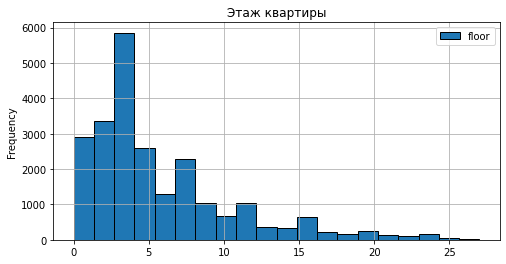

In [49]:
data.plot(y = 'floor', kind = 'hist', bins = 20, grid=True, figsize = (8,4), range = (0, 27), title='Этаж квартиры', ec='black')
data['floor'].describe()

In [50]:
len(data[data['floor'] > 25])

40

- Квартиры продаются на любых этажах начиная от 1 и заканчивая 33
- Больше всего квартир продается на 2-5 этажах
- Квартиры на этажах от 25 и выше встречаются крайне редко

**Рассмотрим зависимость стоимости квадратного метра от этажа квартиры**

In [51]:
print('Коэффициент корреляции Пирсона равен', round(data['price_per_metre'].corr(data['floor']), 2))

Коэффициент корреляции Пирсона равен 0.13


Корреляция в 0.13 говорит о том, что связи между ценой за квадратный метр и этажом квартиры нет

**1.8 Тип этажа квартиры («первый», «последний», «другой»)**

,mean,count,median
floor_category,,,
другой,103495.869312,17290,98275.860
первый,81962.664988,2909,81223.630
последний,93417.460782,3402,88061.395


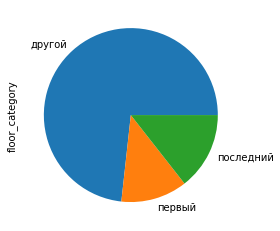

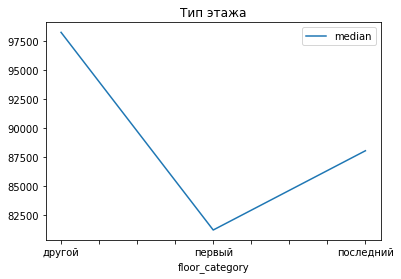

In [54]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'price_per_metre', aggfunc = ['mean', 'count', 'median'])
data.groupby('floor_category')['floor_category'].agg('count').plot(y = 'floor_category', kind = 'pie')
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median', title='Тип этажа')
pivot_table_floor_category

In [56]:
pivot_table_floor_category.loc['другой', 'median']
print('Цена квадратного метра квартиры на первом этаже ниже чем на "другом" на', '{:.2%}'.format((pivot_table_floor_category.loc['другой', 'median'] - pivot_table_floor_category.loc['первый', 'median'])/pivot_table_floor_category.loc['другой', 'median']))
print('Цена квадратного метра квартиры на последнем этаже ниже чем на "другом" на', '{:.2%}'.format((pivot_table_floor_category.loc['другой', 'median'] - pivot_table_floor_category.loc['последний', 'median'])/pivot_table_floor_category.loc['другой', 'median']))
print('Цена квадратного метра квартиры на первом этаже ниже чем на последнем на', '{:.2%}'.format((pivot_table_floor_category.loc['последний', 'median'] - pivot_table_floor_category.loc['первый', 'median'])/pivot_table_floor_category.loc['последний', 'median']))

Цена квадратного метра квартиры на первом этаже ниже чем на "другом" на 17.35%
Цена квадратного метра квартиры на последнем этаже ниже чем на "другом" на 10.39%
Цена квадратного метра квартиры на первом этаже ниже чем на последнем на 7.76%


- Больше всего квартир продается на этаже "другой"
- Квартир на первом и последнем этажах практически одинаково
- Квартиры на первом этаже дешевле чем на "другом" на 17.35%
- Квартиры на последнем этаже дешевле чем на "другом" на 10.39%
- Квартиры на первом этаже дешевле чем на последнем на 7.76%

**1.9 Общее количество этажей в доме**

count    23601.000000
mean        10.658235
std          6.573674
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

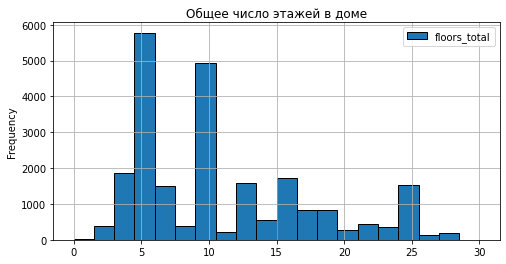

In [154]:
data.plot(y = 'floors_total', kind = 'hist', bins = 20, grid=True, figsize = (8,4), range = (0, 30), title='Общее число этажей в доме', ec='black')
data['floors_total'].describe()

In [155]:
len(data[data['floors_total'] > 30])

28

- Количество этажей в домах Петербурга колеблится от 1 до 36 этажей, что похоже на правду
- Чаще всего встречаются дома с 4-6 этажами и 9-10
- Есть так же довольно много домов с 12, 15-16 и 24-25 этажами - новое высотное жилье

**Рассмотрим зависимость стоимости квадратного метра от этажности дома**

In [156]:
print('Коэффициент корреляции Пирсона равен', round(data['price_per_metre'].corr(data['floors_total']), 2))

Коэффициент корреляции Пирсона равен 0.15


Корреляция в 0.15 говорит о том, что связи между ценой за квадратный метр и этажностью дома нет

**1.10 Расстояние до центра города в метрах**

count    18791.000000
mean     14451.146134
std       8597.076662
min        181.000000
25%       9480.000000
50%      13265.000000
75%      16758.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

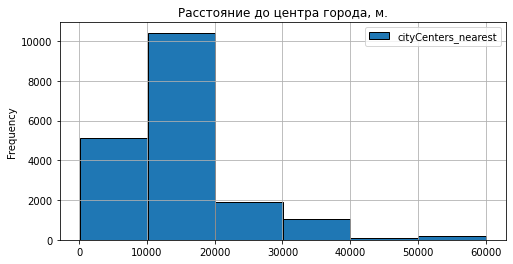

In [157]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 6, grid=True, figsize = (8,4), range = (100, 60000), title='Расстояние до центра города, м.', ec='black')
data['cityCenters_nearest'].describe()

- Больше всего квартир продается от 181 м до 20000 м от центра

In [158]:
sp = 'Санкт-Петербург'
data_Peterburg = data.query('locality_name == @sp ') 
len(data_Peterburg)
data_Peterburg['cityCenters_nearest'].describe()

count    15701.000000
mean     11591.831794
std       4837.012124
min        181.000000
25%       8335.000000
50%      12241.000000
75%      14933.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

In [159]:
len(data[data['cityCenters_nearest'] > 29493])

1447

- Максимальное расстояние до центра города квартир расположенных в Санкт-Петербурге 29493 м
- Следовательно большинство квартир продаются в черте города
- Квартир за городом продаются всего 1447 - это 6,1%

**Рассмотрим зависимость стоимости квадратного метра от удаленности от центра города**

In [160]:
print('Коэффициент корреляции Пирсона равен', round(data['price_per_metre'].corr(data['cityCenters_nearest']), 2))

Коэффициент корреляции Пирсона равен -0.33


Корреляция в -0.33 говорит о том, что связь между ценой за квадратный метр и удаленностью от центра есть, но очень не сильныя и обратная. То есть чем больше удаленность от центра, тем меньше цена, что логично.

<AxesSubplot:xlabel='cityCenters_nearest'>

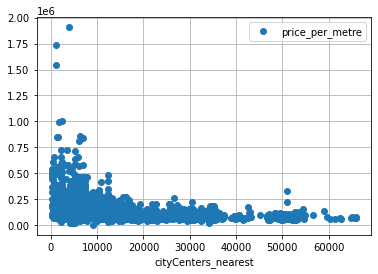

In [161]:
data.plot(x='cityCenters_nearest', y='price_per_metre', style='o', grid=True) 

**1.11 Расстояние до ближайшего аэропорта**

count    18791.000000
mean     29535.617131
std      13062.927474
min          0.000000
25%      18846.000000
50%      27184.000000
75%      38780.500000
max      84869.000000
Name: airports_nearest, dtype: float64

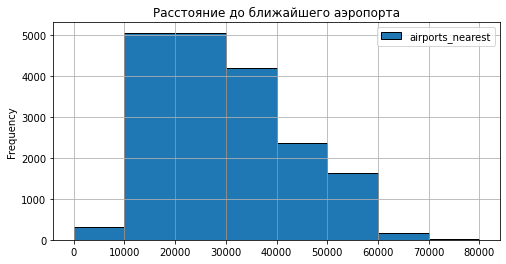

In [162]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 8, grid=True, figsize = (8,4), range = (0, 80000), title='Расстояние до ближайшего аэропорта', ec='black')
data['airports_nearest'].describe()

- Больше всего квартир продается от 10000 м до 59000 м от аэропорта

**1.12 Расстояние до ближайшего парка**

count    23601.000000
mean       167.532266
std        306.745756
min          0.000000
25%          0.000000
50%          0.000000
75%        302.000000
max       3190.000000
Name: parks_nearest, dtype: float64

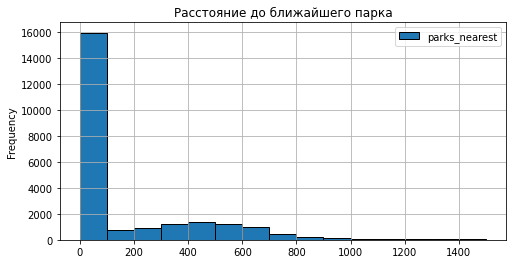

In [163]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 15, grid=True, figsize = (8,4), range = (0, 1500), title='Расстояние до ближайшего парка', ec='black')
data['parks_nearest'].describe()

- Среднее расстояние до парка составляет 167 м
- Большинство квартир с расстоянием до парка от 0 до 100 м
- Где 0 может говорить о том, что парком рядом нет вообще. Проверим

**Рассмотрим сколько квартир не имеют парка в радиусе 3 км**

count    23601.000000
mean         0.469302
std          0.748332
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

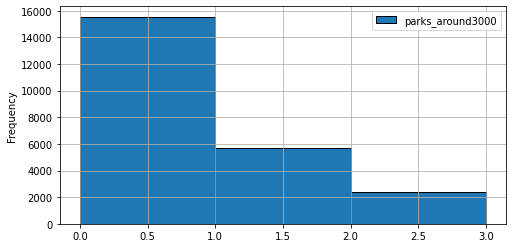

In [164]:
data.plot(y = 'parks_around3000', kind = 'hist', bins = 3, grid=True, figsize = (8,4), range = (0, 3), ec='black')
data['parks_around3000'].describe()

In [165]:
len(data[data['parks_around3000'] < 1])

15551

In [166]:
print('Процент квартир, у которых нет рядом парка:', '{:.2%}'.format((len(data) - len(data[data['parks_around3000'] < 1]))/len(data)))

Процент квартир, у которых нет рядом парка: 34.11%


**1.13 День и месяц публикации объявления**

**Рассмотрим день публикации объявления**

count    23601.000000
mean         2.570103
std          1.788384
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

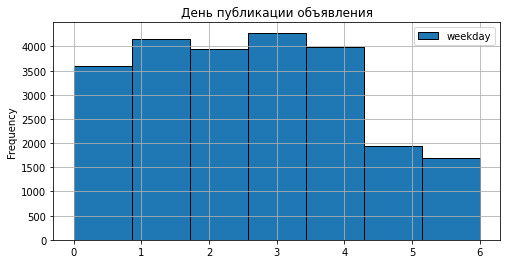

In [167]:
data.plot(y = 'weekday', kind = 'hist', bins = 7, grid=True, figsize = (8,4), range = (0, 6), title='День публикации объявления', ec='black')
data['weekday'].describe()

- Чаще всего публикуют объявления о продаже квартир со вторника по пятницу, то есть в будние дни
- В выходные реже всего публикуют объявления

**Рассмотрим месяц публикации объявления**

count    15468.000000
mean         6.609581
std          3.451492
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

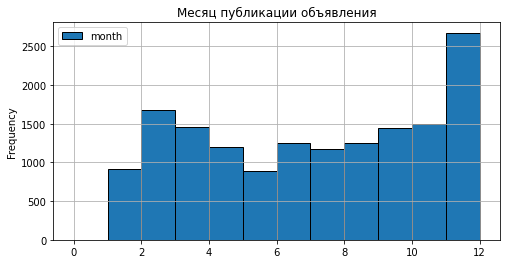

In [204]:
data.plot(y = 'month', kind = 'hist', bins = 12, grid=True, figsize = (8,4), range = (0, 12), title='Месяц публикации объявления', ec='black')
data['month'].describe()

<AxesSubplot:>

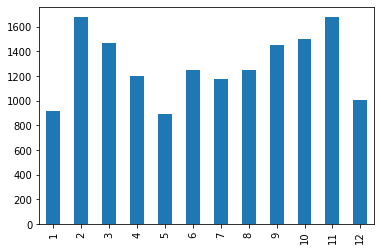

In [202]:
# Код ревьюера

data['month'].value_counts().sort_index().plot(kind='bar')

- Чаще всего квартиры продают с февраля по апрель и с сентябрь по ноябрь
- Есть проседание в декабре-январе, что говорит о нежелании продавать квартиры в новогодний период
- И проседание в летние месяцы, что так же объяснимо

**2. Время продажи квартир**

count    20429.000000
mean       180.972343
std        219.884698
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

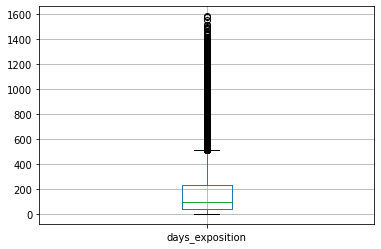

In [169]:
data = data[data['days_exposition'] != 0]

#диаграмма размаха
data.boxplot('days_exposition')

data['days_exposition'].describe()

<AxesSubplot:title={'center':'Количество дней'}, ylabel='Frequency'>

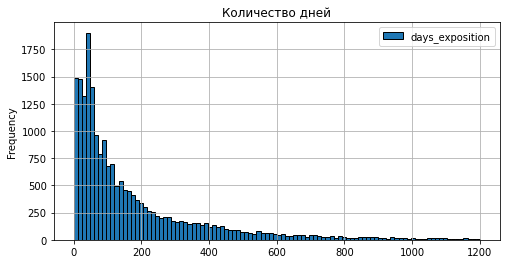

In [170]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (1, 1200), title='Количество дней', ec='black')

- Cудя по гистограмме - мы имеем распределение Пуассона
- **Среднее** время продажи 180 дней - примерно 6 месяцев
- **Медианное** время продажи 95 дня - примерно 3,2 месяца
- Большая часть квартир продавалась в первые 50 дней
- Межквартильный размах - от 45 до 232 дней
- Диаграмма размаха от минимального значения до примерно 500 дней
- Необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше
- Нормальные значения лежат от 1 до 500

count    18681.000000
mean       127.045394
std        119.099516
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

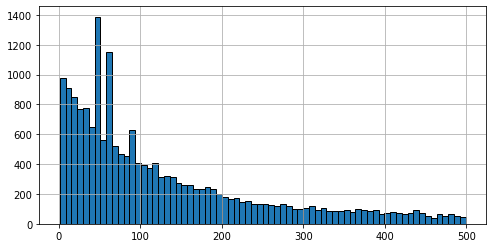

In [171]:
# Рассмотрим поближе сроки продаж от 0 до 500 (без выбросов)
data.query('0 < days_exposition < 500')['days_exposition'].hist(bins=70, figsize=(8,4), ec='black')
data.query('0 < days_exposition < 500')['days_exposition'].describe()

Видим три каких-то интересных выброса, посмотрим поближе

<AxesSubplot:>

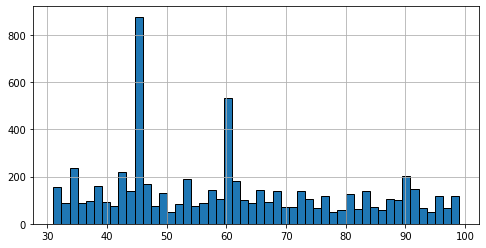

In [172]:
data.query('30 < days_exposition < 100')['days_exposition'].hist(bins=50, figsize=(8,4), ec='black')

Видим пики на 45 день и на 60 день, остальное более мение ровно.

Почему так много квартир продаются в 45 день и в 60 день. Скорее всего это автоматическое снятие объявлений сайтом. Думаю для реальной картины их тоже можно удалить.

count    19019.000000
mean       190.631684
std        224.895712
min          1.000000
25%         42.000000
50%        108.000000
75%        249.000000
max       1580.000000
Name: days_exposition, dtype: float64

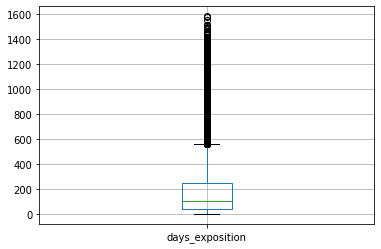

In [173]:
# удалим нереальные значения days_exposition - пики автоматического снятия объявлений 
data = data[(data['days_exposition'] != 45) & (data['days_exposition'] != 60)]

#диаграмма размаха
data.boxplot('days_exposition')

data['days_exposition'].describe()

<AxesSubplot:>

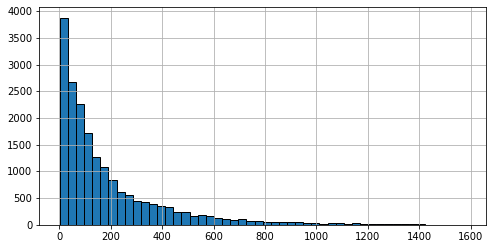

In [174]:
data['days_exposition'].hist(bins=50, figsize=(8,4), ec='black')

Получили новые показатели:
- **Среднее** время продажи 190 дней - примерно 6,3 месяцев
- **Медианное** время продажи 108 дней - примерно 3,6 месяца
- Межквартильный размах - от 42 до 249 дней
- Диаграмма размаха от минимального значения до примерно 580 дней
- Нормальные значения лежат от 1 до 580, остальное выбросы

**3. Факторы влияющие на общую(полную) стоимость объекта:**

  - общая площадь

Коэффициент корреляции Пирсона равен 0.65


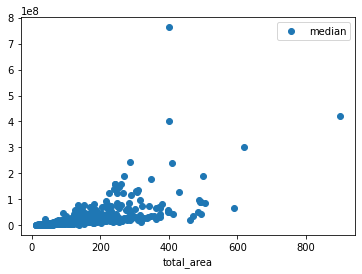

In [175]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.sort_values('median', ascending = False).plot(y = 'median', style = 'o')
print('Коэффициент корреляции Пирсона равен', round(data['total_area'].corr(data['last_price']), 2))

Коэффициент корреляции Пирсона равен 0,65. Это значит, что зависимость между общей стоимостью объекта и общей площадью есть и чем выше общая площадь, тем выше стоимость объекта.

- жилая площадь

Коэффициент корреляции Пирсона равен 0.58


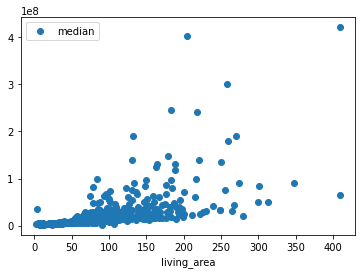

In [176]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.sort_values('median', ascending = False).plot(y = 'median', style = 'o')
print('Коэффициент корреляции Пирсона равен', round(data['living_area'].corr(data['last_price']), 2))

Коэффициент корреляции Пирсона равен 0,58. Зависимость между общей стоимостью объекта и жилой площадью есть, но меньше чем между общей площадью.

- площадь кухни

Коэффициент корреляции Пирсона равен 0.5


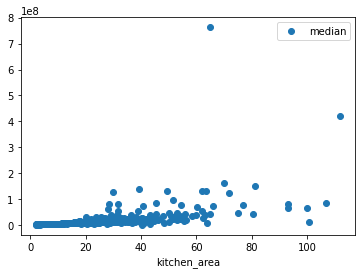

In [177]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.sort_values('median', ascending = False).plot(y = 'median', style = 'o')
print('Коэффициент корреляции Пирсона равен', round(data['kitchen_area'].corr(data['last_price']), 2))

Коэффициент корреляции Пирсона равен 0,5. Зависимость между общей стоимостью объекта и площадью кухни слабее, чем первые две, но она есть. 

Скорее всего есть зависимость между площадью кухни и общей площадью и жилой площадью и общей площадью, а потом уже зависимость между общай площадью и стоимостью объекта.

In [178]:
print('Зависимость между общей площадью и жилой площадью:', round(data['living_area'].corr(data['total_area']), 2))
print('зависимость между общей площадью и площадью кухни:', round(data['kitchen_area'].corr(data['total_area']), 2))

Зависимость между общей площадью и жилой площадью: 0.94
зависимость между общей площадью и площадью кухни: 0.66


- количество комнат

Коэффициент корреляции Пирсона равен 0.36


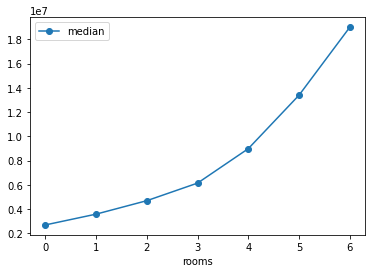

In [179]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False).plot(y = 'median', style = 'o-')
print('Коэффициент корреляции Пирсона равен', round(data['rooms'].corr(data['last_price']), 2))

Коэффициент корреляции Пирсона равен 0,36. Зависимость между общей стоимостью объекта и количеством комнат есть, но слабая.

**Изучим зависимость цены квадратного метра от числа комнат**

Коэффициент корреляции Пирсона равен 0.06


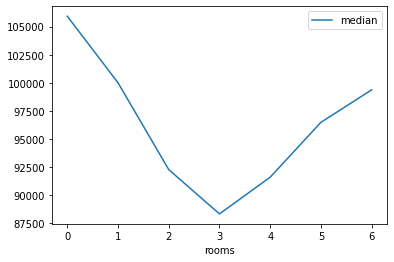

In [180]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_per_metre', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')
print('Коэффициент корреляции Пирсона равен', round(data['rooms'].corr(data['price_per_metre']), 2))

Чем ближе к число комнат к 3, тем цена квадратного метра ниже. Но так как Коэффициент корреляции Пирсона равен 0,06, можно сказать, что зависимости цены квадратного метра от числа комнат нет.

- типа этажа, на котором расположена квартира (первый, последний, другой)

,Среднее,Количество,Медиана
floor_category,,,
другой,6.554297e+06,14063,4750000.0
первый,4.596933e+06,2266,3865000.0
последний,7.171514e+06,2690,4350000.0


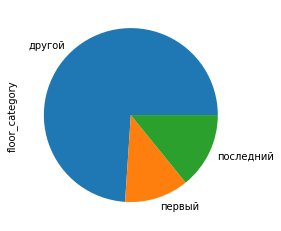

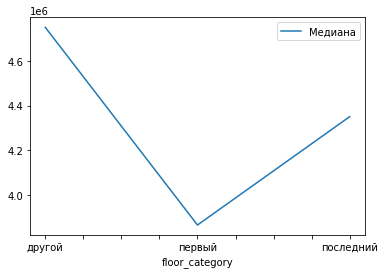

In [181]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
data.groupby('floor_category')['floor_category'].agg('count').plot(y = 'floor_category', kind = 'pie')
pivot_table_floor_category.columns = ['Среднее', 'Количество', 'Медиана']
pivot_table_floor_category.plot(y = 'Медиана')
pivot_table_floor_category

In [182]:
pivot_table_floor_category.loc['другой', 'Медиана']
print('Квартиры на первом этаже дешевле чем на "другом" на', '{:.2%}'.format((pivot_table_floor_category.loc['другой', 'Медиана'] - pivot_table_floor_category.loc['первый', 'Медиана'])/pivot_table_floor_category.loc['другой', 'Медиана']))
print('Квартиры на последнем этаже дешевле чем на "другом" на', '{:.2%}'.format((pivot_table_floor_category.loc['другой', 'Медиана'] - pivot_table_floor_category.loc['последний', 'Медиана'])/pivot_table_floor_category.loc['другой', 'Медиана']))
print('Квартиры на первом этаже дешевле чем на последнем на', '{:.2%}'.format((pivot_table_floor_category.loc['последний', 'Медиана'] - pivot_table_floor_category.loc['первый', 'Медиана'])/pivot_table_floor_category.loc['последний', 'Медиана']))

Квартиры на первом этаже дешевле чем на "другом" на 18.63%
Квартиры на последнем этаже дешевле чем на "другом" на 8.42%
Квартиры на первом этаже дешевле чем на последнем на 11.15%


**- даты размещения (день недели, месяц, год)**

In [183]:
# Посмотрим линейную корреляцию цены за квадратный метр с датой размещения
data_period = data[['last_price', 'weekday', 'month', 'year']]
data_period.corr().round(4)

,last_price,weekday,month,year
last_price,1.0000,0.0066,0.0028,-0.0576
weekday,0.0066,1.0000,0.0122,0.0029
month,0.0028,0.0122,1.0000,-0.1855
year,-0.0576,0.0029,-0.1855,1.0000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='weekday'>,
        <AxesSubplot:xlabel='weekday', ylabel='weekday'>,
        <AxesSubplot:xlabel='month', ylabel='weekday'>,
        <AxesSubplot:xlabel='year', ylabel='weekday'>],
       [<AxesSubplot:xlabel='last_price', ylabel='month'>,
        <AxesSubplot:xlabel='weekday', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>],
       [<AxesSubplot:xlabel='last_price', ylabel='year'>,
        <AxesSubplot:xlabel='weekday', ylabel='year'>,
        <AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

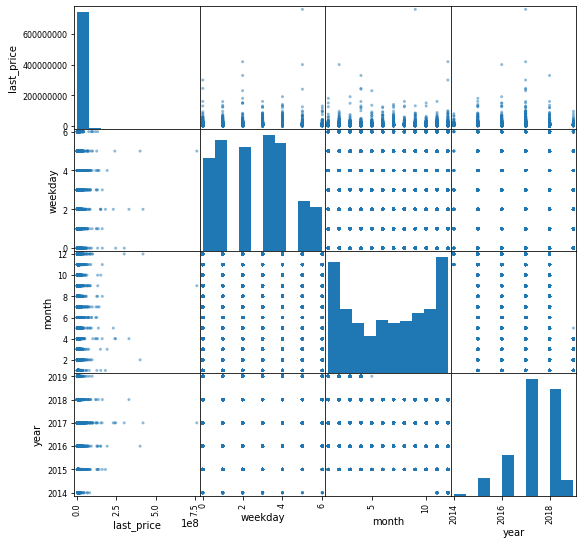

In [184]:
# Визуализируем матрицу корреляции, построим матрицу диаграмм рассеивания
pd.plotting.scatter_matrix(data_period, figsize=(9, 9)) 

**Рассмотрим каждый пункт отдельно**

День размещения:

Коэффициент корреляции Пирсона равен 0.0066


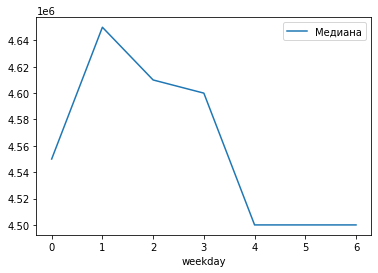

In [185]:
pivot_table_weekday = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['Среднее', 'Количество', 'Медиана']
pivot_table_weekday.plot(y = 'Медиана')

pivot_table_weekday.sort_values('Медиана', ascending = False)
print('Коэффициент корреляции Пирсона равен', round(data['weekday'].corr(data['last_price']), 4))

- Во вторник пик цены, в этот день выставляются самые дорогие квартиры
- В понедельник стоимость квартир ниже чем со вторника по четверг, но выше, чем в пятницу и в выходные
- В пятницу и в выходные самая низкая стоимость

**Изучим зависимость цены квадратного метра и дня недели размещения объявления:**

Коэффициент корреляции Пирсона равен 0.0011


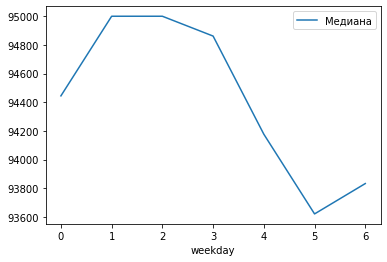

In [186]:
pivot_table_weekday = data.pivot_table(index = 'weekday', values = 'price_per_metre', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['Среднее', 'Количество', 'Медиана']
pivot_table_weekday.plot(y = 'Медиана')

pivot_table_weekday.sort_values('Медиана', ascending = False)
print('Коэффициент корреляции Пирсона равен', round(data['weekday'].corr(data['price_per_metre']), 4))

Цена же квадратного метра ведет себя похоже, но немного по-другому:
- Пик цен во вторник, среду и четверг
- К выходным спад в цене
- Минимум цены видим в субботы

**Но коэффициент корреляции Пирсона в обоих случаях очень маленький, сравнимый с 0. Это говорит о том, что взаимосвязи между ценой и днем публикации нет. Влияет скорее количество объявлений в эти дни.**

Месяц размещения:

Коэффициент корреляции Пирсона равен 0.0028


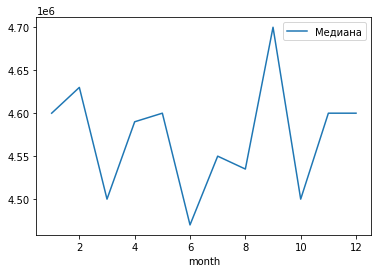

In [187]:
pivot_table_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['Среднее', 'Количество', 'Медиана']
pivot_table_month.plot(y = 'Медиана')

pivot_table_month.sort_values('Медиана', ascending = False)
print('Коэффициент корреляции Пирсона равен', round(data['month'].corr(data['last_price']), 4))

Изучим зависимость цены квадратного метра и месяца размещения объявления:

Коэффициент корреляции Пирсона равен 0.0024


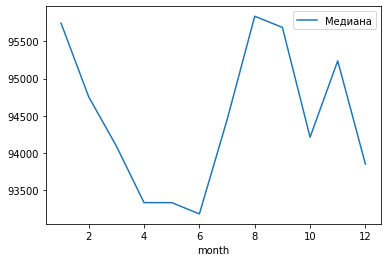

In [188]:
pivot_table_month = data.pivot_table(index = 'month', values = 'price_per_metre', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['Среднее', 'Количество', 'Медиана']
pivot_table_month.plot(y = 'Медиана')

pivot_table_month.sort_values('Медиана', ascending = False)
print('Коэффициент корреляции Пирсона равен', round(data['month'].corr(data['price_per_metre']), 4))

- Самая высокая стоимость квартир в сентябре
- Самая высокая стоимость квадратного метра в августе, сентябре и ноябре
- Самая низкая в июне
- Но коэффициент корреляции Пирсона в обоих случаях очень маленький, сравнимый с 0. Это говорит о том, что взаимосвязи между ценой и месяцем публикации нет. Влияет скорее количество объявлений в эти месяцы.

Год размещения:

Коэффициент корреляции Пирсона равен -0.058


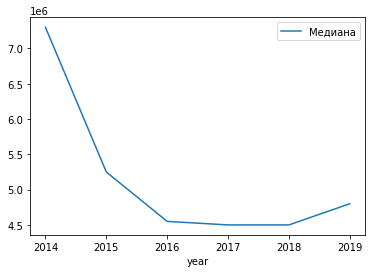

In [189]:
pivot_table_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['Среднее', 'Количество', 'Медиана']
pivot_table_year.plot(y = 'Медиана')

pivot_table_year.sort_values('Медиана', ascending = False)
print('Коэффициент корреляции Пирсона равен', round(data['year'].corr(data['last_price']), 3))

Изучим зависимость цены квадратного метра и года размещения объявления:

Коэффициент корреляции Пирсона равен -0.0031


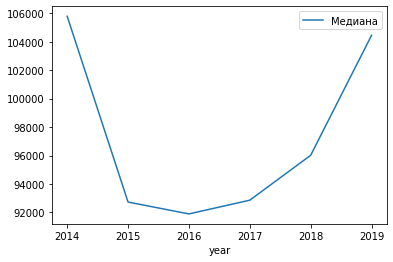

In [190]:
pivot_table_year = data.pivot_table(index = 'year', values = 'price_per_metre', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['Среднее', 'Количество', 'Медиана']
pivot_table_year.plot(y = 'Медиана')

pivot_table_year.sort_values('Медиана', ascending = False)
print('Коэффициент корреляции Пирсона равен', round(data['year'].corr(data['price_per_metre']), 4))

<AxesSubplot:xlabel='month'>

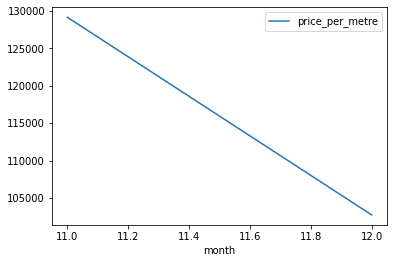

In [191]:
data_2014 = data[data['year'] == 2014]
pivot_table_year_2014 = data_2014.pivot_table(index = 'month', values = 'price_per_metre', aggfunc = ['mean', 'count', 'median'])

pivot_table_year_2014.plot(y = 'median')

- Видим, что цена с 2014 по 2016 год падала
- За 2014 данные есть только за 2 последних месяца и видим. что к концу года цена падает, что и логично перед новым годом.

Скорее всего, это связано с валютным кризисом в 2014 году. 

- С 2016 года цена начала расти
- К 2019 рынок (цена за квадратный метр) вышел на уровень 2014 года, говорит о том, что за 5 лет у людей стала лучше платежеспосодность, значит увеличился спрос и увеличилость предложение

**4. Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [192]:
top_locality = data.pivot_table(index = 'locality_name', values = 'price_per_metre', aggfunc=['count', 'mean'])
top_locality.columns = ['Количество', 'Средняя цена за кв.м.']
top_locality = top_locality.sort_values('Количество', ascending = False).head(10)
top_locality

,Количество,Средняя цена за кв.м.
locality_name,,
Санкт-Петербург,12910,112720.979026
Мурино,512,85493.447520
Кудрово,399,94103.998346
Шушары,373,78149.571635
Всеволожск,309,68425.634498
Пушкин,292,102352.063938
Колпино,275,75196.260982
Парголово,265,89793.002906
Гатчина,244,67499.825943


In [193]:
#самая высокая стоимость
top_locality[top_locality['Средняя цена за кв.м.'] == top_locality['Средняя цена за кв.м.'].max()]

,Количество,Средняя цена за кв.м.
locality_name,,
Санкт-Петербург,12910,112720.979026


In [194]:
#самая низкая стоимость
top_locality[top_locality['Средняя цена за кв.м.'] == top_locality['Средняя цена за кв.м.'].min()]

,Количество,Средняя цена за кв.м.
locality_name,,
Выборг,180,56887.490389


**Самая высокая цена из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, а самая низкая - в Выборге.**

**5. Средняя цена каждого километра от центра Санкт-Петербурга**

In [195]:
data = data[data['cityCenters_nearest_km'].isna() == False]
data['cityCenters_nearest_km'].astype('int') 

1        18
2        13
3         6
4         8
6        19
         ..
23689    16
23690     6
23691     4
23693    34
23697    10
Name: cityCenters_nearest_km, Length: 15468, dtype: int64

In [196]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
price_per_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values= 'price_per_metre', aggfunc=['mean'])
price_per_km.columns = ['Средняя цена за кв.м.']
price_per_km

,Средняя цена за кв.м.
cityCenters_nearest_km,
0.0,235287.875556
1.0,160419.688457
2.0,152843.591575
3.0,117141.467828
4.0,132319.672056
5.0,139802.857234
6.0,148553.237212
7.0,152220.162844
8.0,123146.399571


In [197]:
price_per_km['км'] = price_per_km.index
price_per_km

,Средняя цена за кв.м.,км
cityCenters_nearest_km,,
0.0,235287.875556,0.0
1.0,160419.688457,1.0
2.0,152843.591575,2.0
3.0,117141.467828,3.0
4.0,132319.672056,4.0
5.0,139802.857234,5.0
6.0,148553.237212,6.0
7.0,152220.162844,7.0
8.0,123146.399571,8.0


Text(0.5, 0, 'км')

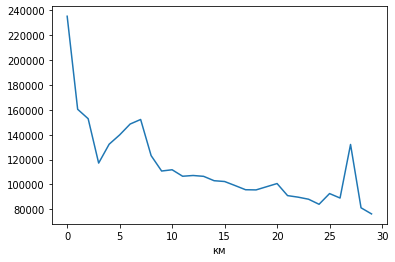

In [210]:
# Код ревьюера
import matplotlib.pyplot as plt

price_per_km['Средняя цена за кв.м.'].plot()
plt.xlabel('км')

<AxesSubplot:xlabel='км'>

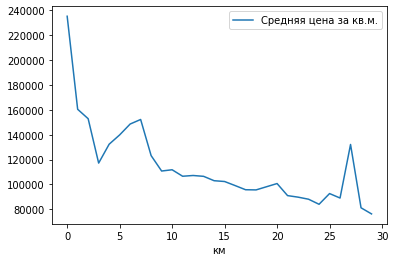

In [198]:
price_per_km.plot(x='км', y='Средняя цена за кв.м.')

<AxesSubplot:xlabel='км'>

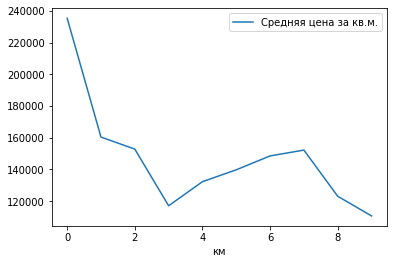

In [199]:
# рассмотрим поближе график от 0 до 10 км
price_per_km[price_per_km['км'] < 10].plot(x='км', y='Средняя цена за кв.м.')

- Цена на квартиры резко падает после 8 км от центра. Примем 8 км за центр Петербурга.
- Есть скачек цен при 5-7 км, скорее всего обусловлен инфраструктурой города
- Есть скачек цен в районе 27 км, может быть в объявлении неправильно указали город. Есть предположение, что квартиры в Пушкине стоят дороже чем на окраине Петербурга

In [200]:
spb_27 = data[(data['cityCenters_nearest_km'] > 20) & (data['locality_name'] == 'Санкт-Петербург')]
print('Стоимость квадратного метра на окраине Санкт-Петербурга (более 20 км от центра):', spb_27['price_per_metre'].mean().round())

pushkin = data[(data['locality_name'] == 'Пушкин')]
print('Стоимость квадратного метра в Пушкине:', pushkin['price_per_metre'].mean().round())

Стоимость квадратного метра на окраине Санкт-Петербурга (более 20 км от центра): 89404.0
Стоимость квадратного метра в Пушкине: 102352.0


## Общий вывод

- Чаще всего продаются квартиры общей площадью от 30 до 65 кв.м.
- С жилой полощадью от 18 до 20 или 25 до 35 кв.м.
- С кухнями от 6 до 10 кв.м.
- Ценой от 2,5 до 5,5 млн.руб.
- Цена за квадратный метр от 60 до 130 тыс. руб.
- Чаще продают квартиры с 1 и 2 комнатами
- В среднем квартиры имеют высоту потолков 2,7 м.
- Больше всего квартир продается на 2-5 этажах. Дешевле всего квартиры на первом этаже
- Чаще всего встречаются дома с 4-6 этажами и 9-10 этажами
- Больше всего квартир продается от 181 м до 20000 м от центра
- Больше всего квартир продается от 10000 м до 59000 м от аэропорта
- Среднее расстояние до парка составляет 167 м. В то же время процент квартир, у которых нет рядом парка: 34.11%
- Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.
- Чаще всего квартиры продают с февраля по апрель и с сентябрь по ноябрь. Меньше всего в декабре-январе и в летние месяцы
- Нормальные значения времени продажи квартир - от 1 до 580 дней
- Среди городов с наибольшим числом объявлений , самые дорогие цены за квадратный метр квартиры в Санкт-Петербурге, а самые дешевые - в Выборге.
- Цена за квадратный метр квартиры в Санкт-Петербурге начинает резко падать после 8 км от центра.
- Квартиры размещенные в 2014 году имеют самую высокую цену квадратного метра. Период 2015-2018 - период низких цен на квартиры.

Исследование диаграмм рассеивание показало прямую зависимость между:
- стоимостью объекта и общей площадью есть и чем выше общая площадь, тем выше стоимость объекта
- общей стоимостью объекта и количеством комнат
- ценой за квадратный метр и удаленностью от центра. Чем больше удаленность от центра, тем меньше цена.
